In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic = pd.read_csv("data/titanic.csv")
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [56]:
titanic['age']=titanic['age'].replace(['?',None]).astype(float)
titanic['fare'] = titanic["fare"].replace(['?'], [None]).astype('float')
titanic[['age','fare']]

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500
...,...,...
1304,14.5000,14.4542
1305,14.5000,14.4542
1306,26.5000,7.2250
1307,27.0000,7.2250


In [57]:
df = titanic.groupby(["pclass", "sex"]).mean()
df.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [93]:
pops = pd.read_csv("data/state_pops.csv")
pops

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
2,AL,2011,4801627.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
...,...,...,...
1267,USA,2013,316128839.0
1268,USA,2009,306771529.0
1269,USA,2010,309326295.0
1270,USA,2011,311582564.0


In [59]:
pops.set_index("state")

,year,population
state,,
AL,2012,4817528.0
AL,2010,4785570.0
AL,2011,4801627.0
AL,2009,4757938.0
AL,2013,4833722.0
...,...,...
USA,2013,316128839.0
USA,2009,306771529.0
USA,2010,309326295.0


In [60]:
pops.set_index("year")

,state,population
year,,
2012,AL,4817528.0
2010,AL,4785570.0
2011,AL,4801627.0
2009,AL,4757938.0
2013,AL,4833722.0
...,...,...
2013,USA,316128839.0
2009,USA,306771529.0
2010,USA,309326295.0


In [61]:
pops.set_index(["state","year"])

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [62]:
pops.set_index(["state","year"]).sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [63]:
pops.set_index(["state","year"],inplace=True)

In [64]:
pops.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

inplace=True는 데이터 원본을 인덱스가 적용된 형태로 고정시키는 효과가 있다. 
그러나 inplace=True가 없으면 index를 적용하여 나온 내용이 한번 출력되기만 하고 원본 데이터에 영향을 주지는 못한다.


In [65]:
pops.sort_index(ascending = True,inplace=True)

In [66]:
kor_s = [
    1427.22,
    1192.57,
    993.93,
    965.23,
    1130.65,
    1207.23,
    1310.46,
    1477.18,
    1220.04,
    948.05,
    1139.97,
    1267.64,
    1379.61,
    1643.80,
    1931.38,
    2061.07,
    2094.65,
    2449.08,
    2746.21,
    2913.36,
    3217.86,
    4246.11
]
us_s = [
    3783.67,
    2029.61,
    1539.73,
    1647.17,
    1986.53,
    2099.32,
    2263.41,
    2578.47,
    2161.68,
    1845.39,
    2349.89,
    2677.44,
    2965.74,
    3541.29,
    4375.10,
    4945.55,
    4987.79,
    6235.30,
    7425.96,
    7940.36,
    10201.51,
    14294.87
]
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

In [67]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

Text(0.5, 0, 'Year')

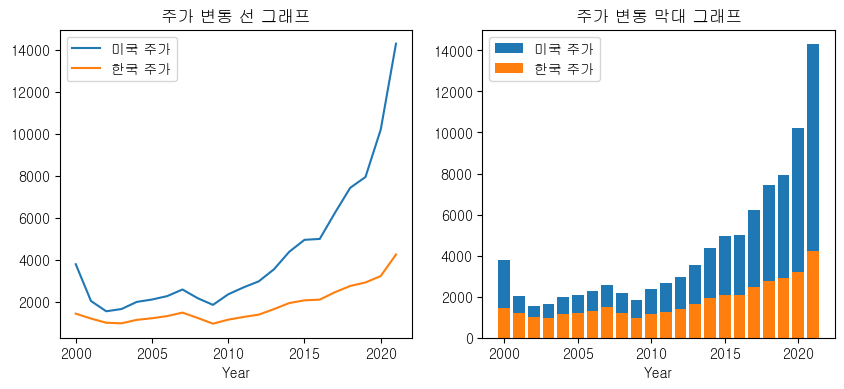

In [68]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(years, us_s, label="미국 주가")
plt.plot(years, kor_s, label="한국 주가")
plt.legend()
plt.title("주가 변동 선 그래프")
plt.xlabel("Year")
plt.subplot(1,2,2)
plt.bar(years, us_s, label="미국 주가")
plt.bar(years, kor_s, label="한국 주가")
plt.legend()
plt.title("주가 변동 막대 그래프")
plt.xlabel("Year")

In [69]:
pops.sort_index(level=1) 

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [70]:
pops.sort_index(level=[1], ascending=[False])

,,population
state,year,
AK,2013,735132.0
AL,2013,4833722.0
AR,2013,2959373.0
AZ,2013,6626624.0
CA,2013,38332521.0
...,...,...
VT,1990,564798.0
WA,1990,4903043.0
WI,1990,4904562.0


In [71]:
pops.sort_index(level=[0,1], ascending=[False,True])

population
state year            
WY    1990    453690.0
      1991    459260.0
      1992    466251.0
      1993    473081.0
      1994    480283.0
...                ...
AK    2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0

[1272 rows x 1 columns]

In [72]:
pops.sort_index(level=[0],ascending=[False])

population
state year            
WY    1990    453690.0
      1991    459260.0
      1992    466251.0
      1993    473081.0
      1994    480283.0
...                ...
AK    2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0

[1272 rows x 1 columns]

In [73]:
pops.loc['CA'].sort_index(ascending=True)

,population
year,
1990,29959515.0
1991,30470736.0
1992,30974659.0
1993,31274928.0
1994,31484435.0
1995,31696582.0
1996,32018834.0
1997,32486010.0
1998,32987675.0


In [74]:
pops.loc[['CA','AK']].sort_index(ascending=True)

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0
      1996    608569.0
      1997    612968.0
      1998    619933.0
      1999    624779.0
      2000    627963.0
      2001    633714.0
      2002    642337.0
      2003    648414.0
      2004    659286.0
      2005    666946.0
      2006    675302.0
      2007    680300.0
      2008    687455.0
      2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0
CA    1990  29959515.0
      1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
      1995  31696582.0
      1996  32018834.0
      1997  32486010.0
      1998  32987675.0
      1999  33499204.0
      2000  33987977.0
      2001  34479458.0
      2002  34871843.0
      2003  35253159.0
      2004  35574576.0
      2005  35827943.0
      2006  36021202.0
      2007  36250311.0
      2008  36604337.0
      2009  36961229.0
      2010  37333601.0
      2011  37668681.0
      2012  37999878.0
      2013  38332521.0

In [75]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [76]:
pops.loc['NM':'TX']

population
state year            
NM    1990   1521574.0
      1991   1555305.0
      1992   1595442.0
      1993   1636453.0
      1994   1682398.0
...                ...
TX    2009  24801761.0
      2010  25245178.0
      2011  25640909.0
      2012  26060796.0
      2013  26448193.0

[312 rows x 1 columns]

In [77]:
pops.loc['MT'].iloc[2]

population    825770.0
Name: 1992, dtype: float64

In [78]:
pops.loc[('MT', 1992)]

population    825770.0
Name: (MT, 1992), dtype: float64

In [79]:
pops.loc[['AK']][2:6]

population
state year            
AK    1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0

In [80]:
pops.loc[['AK']].iloc[2:6]

population
state year            
AK    1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0

In [81]:
pops.loc[("AK", 2011):("AL",1993)]

population
state year            
AK    2011    723375.0
      2012    730307.0
      2013    735132.0
AL    1990   4050055.0
      1991   4099156.0
      1992   4154014.0
      1993   4214202.0

In [82]:
titanic['name'].loc[19]

'Beattie, Mr. Thomson'

In [83]:
titanic.loc[19]['name']

'Beattie, Mr. Thomson'

In [84]:
titanic[titanic['name']=='Beattie, Mr. Thomson']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,?,"Winnipeg, MN"


In [109]:
pops['year']=pops['year'].replace([' '],[None])
pops.set_index(['year','state']).loc[1990]

,population
state,
AL,4050055.0
AK,553290.0
AZ,3684097.0
AR,2356586.0
CA,29959515.0
CO,3307618.0
CT,3291967.0
DE,669567.0
DC,605321.0
